<a href="https://colab.research.google.com/github/Jothish2283/Fast-RCNN_torch/blob/main/Fast_RCNN_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Getting the data**

In [ ]:
!pip install -q --upgrade selectivesearch torch_snippets
from torch_snippets import *
import selectivesearch
from google.colab import files
import pandas as pd

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jothishs","key":"dc1dc9d856809d36afeed01f62aa33fc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sixhky/open-images-bus-trucks/
!unzip -qq open-images-bus-trucks.zip

kaggle.json
 98% 361M/367M [00:01<00:00, 247MB/s]
100% 367M/367M [00:01<00:00, 217MB/s]


##**Data Visualization**

In [ ]:
img_dir="images/images"

In [ ]:
box_df=pd.read_csv("/content/df.csv")
box_df.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452


In [ ]:
def show_samples(idx, df=box_df, toshow=True):

  df=df[["ImageID","LabelName","XMin","XMax", "YMin", "YMax"]]
  unique_id=df.ImageID.unique()
  id=unique_id[idx]
  df=df[df["ImageID"]==id]

  labels=df.LabelName.values.tolist()
  img_path="images/images/"+id+".jpg"
  img=cv2.imread(img_path, 1)[...,::-1] #BGR->RGB
  h,w,c=img.shape
  boxes=df[[ "XMin","YMin", "XMax", "YMax"]].values
  boxes=(np.array(boxes)*np.array([w,h,w,h])).astype(np.uint16)

  if toshow:
    show(img, bbs=boxes, texts=labels, sz=8)
  return img, boxes, labels, img_path

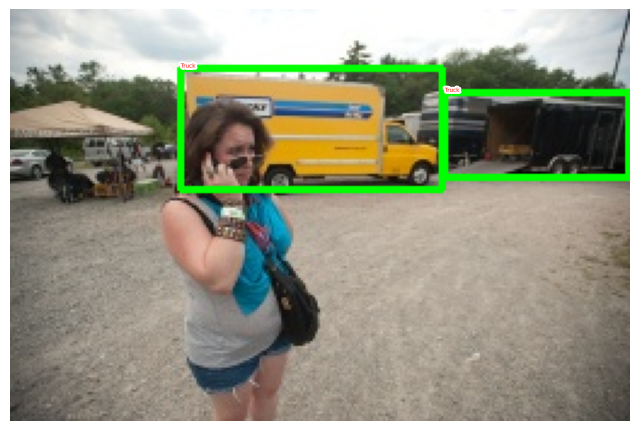

In [ ]:
img, boxes, labels, img_path=show_samples(1) #boxes->[[]] labels->[]

In [ ]:
boxes

array([[ 70,  24, 178,  74],
       [179,  34, 255,  69]], dtype=uint16)

##**Helper Functions**

In [ ]:
def select_candidates(img=None, img_path=None):
  if img_path:
    img=read(img_path, 1)

  img_labels, regions=selectivesearch.selective_search(img, scale=200, min_size=100)

  candidates=[]
  img_ar=np.prod(img.shape[:2])
  for r in regions:
      if r["size"]>img_ar: continue
      if r["size"]<(0.05*img_ar): continue
      if r["rect"] in candidates:continue
      x,y,w,h=r["rect"]
      candidates.append(r["rect"]) #r["rect"]->tuple, this converts tuple->list
  return np.array(candidates).tolist() #candidates->[[]]

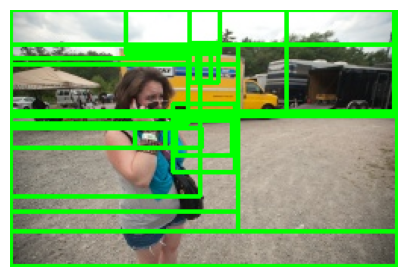

# bounding box:  22

In [ ]:
show(img_path,bbs=select_candidates(img_path=img_path))
print("\n\n# bounding box: ",len(select_candidates(img_path=img_path)))

In [ ]:
def box_ar(box):
  if (box[2]-box[0])>0 and (box[3]-box[1])>0:
    ar=(box[2]-box[0])*(box[3]-box[1])
  else:
    ar=0
  return ar

def IOU(boxa, boxb, epsilon=1e-5):
  intersection_box=[max(boxa[0], boxb[0]), max(boxa[1], boxb[1]), min(boxa[2], boxb[2]), min(boxa[3], boxb[3])]
  intersection_ar=box_ar(intersection_box)
  boxa_ar=box_ar(boxa)
  boxb_ar=box_ar(boxb)
  union_ar=boxa_ar+boxb_ar-intersection_ar
  iou=intersection_ar/(union_ar + epsilon)
  return iou

##**Pre-processing**

In [ ]:
FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS = [], [], [], [], [], []
N = 900
for i in range(N):

  img_arr, boxes, labels, img_path= show_samples(i, toshow=False)
  H,W,_=img_arr.shape
  candidates=select_candidates(img=img_arr)
  candidates=np.array([(x,y,x+w,y+h) for x,y,w,h in candidates]) #selective search returns(x,y,w,h) and not (xmin, ymin, xmax, ymax)
  ious, rois, clss, deltas = [], [], [], []

  ious=np.array([[IOU(candidate, box) for box in boxes] for candidate in candidates])

  for k, candidate in enumerate(candidates):
    cx,cy,cX,cY=candidate
    candidate_iou=ious[k] #this returns an array
    best_iou_at=np.argmax(candidate_iou)
    best_iou=candidate_iou.max()
    if best_iou>0.3: clss.append(labels[best_iou_at])
    else: clss.append("Background")

    _x,_y,_X,_Y=bbx=boxes[best_iou_at]
    delta=np.array([_x-cx, _y-cy, _X-cX, _y-cY])/np.array([W,H,W,H])
    deltas.append(delta)
    rois.append(candidate/np.array([W,H,W,H]))

  FPATHS.append(img_path)
  GTBBS.append(boxes)
  CLSS.append(clss)
  DELTAS.append(np.array(deltas))
  ROIS.append(np.array(rois))
  IOUS.append(ious)

FPATHS, GTBBS, CLSS, DELTAS, ROIS = [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS]] #does not change dim

In [ ]:
DELTAS[1].shape, ROIS[1].shape, GTBBS[1], CLSS[1], FPATHS[1]

((22, 4),
 (22, 4),
 array([[ 70,  24, 178,  74],
        [179,  34, 255,  69]], dtype=uint16),
 ['Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Truck',
  'Background',
  'Background',
  'Background',
  'Truck',
  'Truck',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background',
  'Background'],
 'images/images/00006bdb1eb5cd74.jpg')

In [ ]:
targets=pd.DataFrame(flatten(CLSS), columns=["label"])
targets["label"].value_counts()

Background    12672
Bus            4254
Truck          3966
Name: label, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
targets["label"]=label_encoder.fit_transform(targets.label.values)

In [ ]:
classes=label_encoder.classes_
classes

array(['Background', 'Bus', 'Truck'], dtype=object)

In [ ]:
CLSS=[label_encoder.transform(c) for c in CLSS]

In [ ]:
CLSS[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])

#**Creating Dataset and Dataloaders**

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
def preprocess_image(img):
    img = torch.tensor(img).permute(2,0,1) #img_shape b4 is (224,224,3) as it comes from cv2.Resize
    img = normalize(img)
    return img.to(device).float()

In [ ]:
class Dataset():
  def __init__(self,fpaths, gtbbs, clss, deltas,rois):
    self.fpaths=fpaths
    self.gtbbs=gtbbs
    self.clss=clss
    self.deltas=deltas
    self.rois=rois

  def __len__(self): return len(self.fpaths)

  def __getitem__(self, idx):
    fpath=str(self.fpaths[idx])
    img= cv2.imread(fpath, 1)[...,::-1] #BGR->RGB
    gtbbs=self.gtbbs[idx]
    clss=self.clss[idx]
    deltas=self.deltas[idx]
    rois=self.rois[idx] #rois contains only the coords while crops contain image cuts

    return img, rois, clss, deltas, gtbbs, fpath

  def collate(self, batch): #collate is used to manipulate the batch formation in dataloader

    '''This function takes in the parent images extracts the crops [rois] and returns them as
    individual images for ex: if n=2 the crops of image 1: 21 and the crops of image 2: 54 then
    the returned shape will be (21+54=75)'''

    inputs, labels, img_deltas, rois, ridx= [], [], [], [], []
    for idx in range(len(batch)):
      img, img_rois, clss, deltas, gtbbs, fpath= batch[idx]
      img=cv2.resize(img, (224,224))
      img=(preprocess_image(img/255.))[None] #None adds a dim in batch size
      ridx.extend([idx]*len(img_rois)) #print len(rois)
      inputs.extend(img)
      labels.extend(clss)
      img_deltas.extend(deltas)
      rois.extend(np.array(img_rois))

    inputs=[(input)[None] for input in inputs]
    inputs= torch.cat(inputs).to(device)
    labels= torch.Tensor(labels).long().to(device)
    img_deltas= torch.Tensor(np.array(img_deltas)).float().to(device)
    rois = torch.Tensor(np.array(rois)).float().to(device)
    ridx = torch.Tensor(ridx).float().to(device)

    return inputs, rois, ridx, labels, img_deltas

In [ ]:
n_train=int(0.9*len(FPATHS))
train_dataset=Dataset(FPATHS[:n_train], GTBBS[:n_train], CLSS[:n_train], DELTAS[:n_train], ROIS[:n_train])
test_dataset=Dataset(FPATHS[n_train:], GTBBS[n_train:], CLSS[n_train:], DELTAS[n_train:], ROIS[n_train:])

train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=2,collate_fn=train_dataset.collate)
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=test_dataset.collate)

In [ ]:
inputs, rois, ridx, labels, deltas=next(iter(train_dataloader))

In [ ]:
inputs, rois, ridx, labels, deltas

(tensor[2, 3, 224, 224] n=301056 (1.1Mb) x∈[-2.118, 2.640] μ=0.176 σ=1.101,
 tensor[47, 4] n=188 x∈[0., 0.996] μ=0.473 σ=0.364,
 tensor[47] x∈[0., 1.000] μ=0.468 σ=0.504,
 tensor[47] i64 x∈[0, 2] μ=0.298 σ=0.587,
 tensor[47, 4] n=188 x∈[-0.853, 0.688] μ=-0.111 σ=0.356)

#**Building Model**

In [ ]:
vgg_weights=torchvision.models.VGG16_BN_Weights.DEFAULT
vgg_backbone_model=torchvision.models.vgg16_bn(weights=vgg_weights)
vgg_backbone_model.classifier=torch.nn.Sequential()
vgg_backbone_model=nn.Sequential(*list(vgg_backbone_model.features.children())[:-1])
# for idx, params in enumerate(vgg_backbone_model.parameters()): #Fine tuning
#   if idx<23:
#     params.requires_grad=False

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:08<00:00, 69.0MB/s]


In [ ]:
!pip -q install torchinfo

In [ ]:
from torchinfo import summary
summary(vgg_backbone_model, input_size=(1,3,224,224), col_names=["input_size","output_size","num_params","trainable"], row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
Sequential (Sequential)                  [1, 3, 224, 224]          [1, 512, 14, 14]          --                        True
├─Conv2d (0)                             [1, 3, 224, 224]          [1, 64, 224, 224]         1,792                     True
├─BatchNorm2d (1)                        [1, 64, 224, 224]         [1, 64, 224, 224]         128                       True
├─ReLU (2)                               [1, 64, 224, 224]         [1, 64, 224, 224]         --                        --
├─Conv2d (3)                             [1, 64, 224, 224]         [1, 64, 224, 224]         36,928                    True
├─BatchNorm2d (4)                        [1, 64, 224, 224]         [1, 64, 224, 224]         128                       True
├─ReLU (5)                               [1, 64, 224, 224]         [1, 64, 224, 224]         --                        --
├─MaxPo

In [ ]:
#output dimension from vgg_backbone_model: [n, 25088]
from torchvision.ops import RoIPool

class FRCNN(nn.Module):
  def __init__(self, vgg_out_dim=512*7*7):
    super().__init__()

    self.vgg_backbone=vgg_backbone_model

    self.roipool=RoIPool(7, 14/224) #224->initial size of the img; 14->feature map size #this func helps to resize our rois to match the feature dim

    self.classifier=nn.Sequential(nn.Linear(in_features=vgg_out_dim,
                                            out_features=3),) #3-> background, bus, truck
                                  # nn.Softmax(dim=-1))

    self.boxes_layer=nn.Sequential(nn.Linear(in_features=vgg_out_dim,
                                             out_features=512),
                                   nn.ReLU(),
                                   nn.Linear(in_features=512,
                                             out_features=4),
                                   nn.Tanh()) #tanh returns values in range[-1,1] this is where the delta varibale lies
    #loss
    self.cel= nn.CrossEntropyLoss()
    self.l1=nn.L1Loss() #MAE loss

  def forward(self, img_in, rois, ridx):
    feature_map=self.vgg_backbone(img_in)

    roipool_in=torch.cat([ridx.unsqueeze(dim=-1), rois*224], dim=-1)

    roipool_layer_out=self.roipool(feature_map, roipool_in)

    x=roipool_layer_out.view(len(roipool_layer_out), -1) #-1-> multiplication of all dim/len(roipool_layer_out)

    x_class=self.classifier(x)
    x_boxes=self.boxes_layer(x)
    return x_class, x_boxes

  def calc_loss(self, probs, labels, deltas, _deltas): #_deltas->gtbbs; deltas->rois
    class_loss=self.cel(probs, labels)
    ixs,= torch.where(labels!=0) #ignoring "Background" class
    _deltas=_deltas[ixs]
    deltas=deltas[ixs]
    self.mag_factor=10

    if len(ixs)>0:
      box_loss= self.l1(deltas, _deltas)
      return class_loss+self.mag_factor*box_loss, class_loss.item(), box_loss.item()

    else:
      box_loss=0
      return class_loss+self.mag_factor*box_loss, class_loss.item(), box_loss

#**Training and Testing Loop**

In [ ]:
def acc_fn(y_p, y):
  y_p=torch.softmax(y_p, dim=-1)
  y_p=y_p.argmax(dim=-1)
  correct=torch.eq(y_p, y).sum().item()
  acc=correct/len(y_p)
  return acc

In [ ]:
def train(model, model_in, optimizer, criterion):
  model.to(device)
  model.train()
  inputs, rois, ridx, _labels, _deltas=model_in
  labels, deltas= model(inputs, rois, ridx)
  loss_t, loss_c, loss_b=criterion(labels, _labels, deltas, _deltas)
  train_acc=acc_fn(labels,_labels)
  optimizer.zero_grad()
  loss_t.backward()
  optimizer.step()

  return loss_t.item(), loss_c, loss_b, train_acc

In [ ]:
def test(model, model_in, criterion, scheduler):
  model.eval()
  with torch.no_grad():
    inputs, rois, ridx, _labels, _deltas=model_in
    labels, deltas= model(inputs, rois, ridx)
    loss_t, loss_c, loss_b=criterion(labels, _labels, deltas, _deltas)
    test_acc=acc_fn(labels,_labels)
    scheduler.step(loss_t)

  return loss_t.item(), loss_c, loss_b, test_acc

In [ ]:
frcnn= FRCNN().to(device)
criterion=frcnn.calc_loss
optimizer=torch.optim.Adam(params=frcnn.parameters())
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer)
EPOCHS=5
log=Report(EPOCHS)

In [ ]:
summary(frcnn, input_size=[(1,3,224,224), (1,4), (1,)], col_names=["input_size","output_size","num_params","trainable"], row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
FRCNN (FRCNN)                            [1, 3, 224, 224]          [1, 3]                    --                        True
├─Sequential (vgg_backbone)              [1, 3, 224, 224]          [1, 512, 14, 14]          --                        True
│    └─Conv2d (0)                        [1, 3, 224, 224]          [1, 64, 224, 224]         1,792                     True
│    └─BatchNorm2d (1)                   [1, 64, 224, 224]         [1, 64, 224, 224]         128                       True
│    └─ReLU (2)                          [1, 64, 224, 224]         [1, 64, 224, 224]         --                        --
│    └─Conv2d (3)                        [1, 64, 224, 224]         [1, 64, 224, 224]         36,928                    True
│    └─BatchNorm2d (4)                   [1, 64, 224, 224]         [1, 64, 224, 224]         128                       True
│    

In [ ]:
from tqdm.auto import tqdm
for epoch in tqdm(range(EPOCHS)):

  n=len(train_dataloader)
  train_acc, train_loss, test_acc, test_loss, =[],[],[],[]
  for ix, inputs in enumerate(train_dataloader):
    loss_t, loss_c, loss_b, acc=train(frcnn, inputs, optimizer, criterion)
    pos=epoch+(ix+1)/n
    log.record(pos=pos, train_loss_t=loss_t, train_acc=acc, train_loss_c=loss_c, train_loss_b=loss_b, end="\r")

  n=len(test_dataloader)
  for ix, inputs in enumerate(test_dataloader):
    loss_t, loss_c, loss_b, acc=test(frcnn, inputs, criterion, scheduler)
    pos=epoch+(ix+1)/n
    log.record(pos=pos, val_loss_t=loss_t, val_acc=acc, val_loss_c=loss_c, val_loss_b=loss_b, end="\r")
  log.report_avgs(epoch+1)

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH: 1.000  train_loss_c: 0.945  train_loss_b: 0.143  val_loss_t: 1.994  val_loss_c: 0.845  train_acc: 0.598  val_loss_b: 0.115  val_acc: 0.611  train_loss_t: 2.374  (1902.10s - 7608.41s remaining)
EPOCH: 2.000  train_loss_c: 0.826  train_loss_b: 0.107  val_loss_t: 1.819  val_loss_c: 0.813  train_acc: 0.620  val_loss_b: 0.101  val_acc: 0.623  train_loss_t: 1.891  (3822.32s - 5733.47s remaining)
EPOCH: 3.000  train_loss_c: 0.810  train_loss_b: 0.104  val_loss_t: 1.815  val_loss_c: 0.811  train_acc: 0.627  val_loss_b: 0.100  val_acc: 0.622  train_loss_t: 1.853  (5792.54s - 3861.69s remaining)
EPOCH: 4.000  train_loss_c: 0.810  train_loss_b: 0.104  val_loss_t: 1.816  val_loss_c: 0.811  train_acc: 0.627  val_loss_b: 0.100  val_acc: 0.622  train_loss_t: 1.853  (7775.57s - 1943.89s remaining)
EPOCH: 5.000  train_loss_c: 0.810  train_loss_b: 0.104  val_loss_t: 1.816  val_loss_c: 0.811  train_acc: 0.627  val_loss_b: 0.100  val_acc: 0.622  train_loss_t: 1.853  (9744.01s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 2211.91it/s]


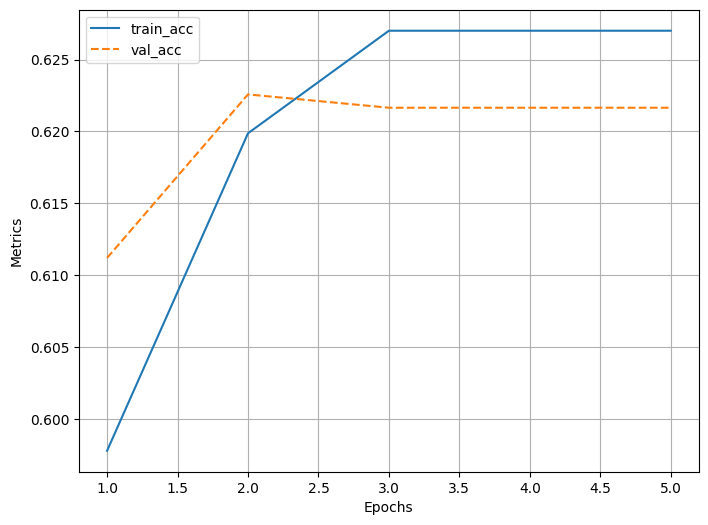

In [ ]:
log.plot_epochs(["train_acc","val_acc"])

100%|██████████| 106/106 [00:00<00:00, 2145.79it/s]


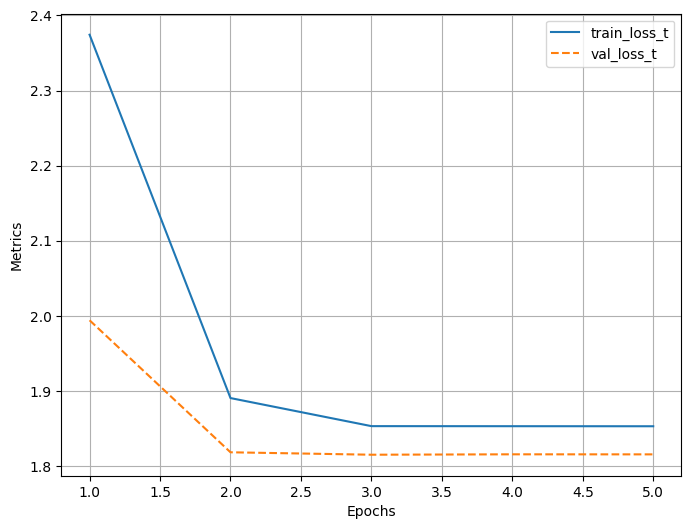

In [ ]:
log.plot_epochs(["train_loss_t","val_loss_t"])

In [ ]:
torch.save(frcnn.state_dict(), "rcnn_model_save")

In [ ]:
!zip -r /content/frcnn_saved_model.zip /content/frcnn_model_save

	zip warning: name not matched: /content/frcnn_model_save

zip error: Nothing to do! (try: zip -r /content/frcnn_saved_model.zip . -i /content/frcnn_model_save)


In [ ]:
# files.download('/content/frcnn_saved_model.zip')

In [ ]:
#!wget https://github.com/Jothish2283/RCNN_torch/raw/main/frcnn_saved_model.zip

In [ ]:
# import zipfile
# zip_ref=zipfile.ZipFile("frcnn_saved_model.zip")
# zip_ref.extractall()
# zip_ref.close()

In [ ]:
# frcnn_loaded_model=FRCNN()
# frcnn_loaded_model.load_state_dict(torch.load("content/frcnn_model_save", map_location=device))

#**Testing on custom images**

In [ ]:
from torchvision.ops import nms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import requests
def download_img(link, name):
  request=requests.get(str(link))
  with open(str(name)+".jpg", "wb") as local_file:
    local_file.write(request.content)
    local_file.close

In [ ]:
links_dict={"2bus": "https://c8.alamy.com/comp/AJCRA5/two-buses-at-bus-stop-AJCRA5.jpg",
            "bus": "https://files.guidedanmark.org/files/485/285492_gratis-bus-lasse-hjort-gdk.jpg",
            "truck_1": "https://di-uploads-pod34.dealerinspire.com/vancechevroletbuickgmc/uploads/2021/04/2020-silverado-1500-trail-boss-mov.jpg",
            "truck_2": "https://media.wired.com/photos/60f9b8a417ecd990dacf3c75/191:100/w_1280,c_limit/Business-Self-Driving-Trucks-TuSimple.jpg",
            "ship": "https://robbreport.com/wp-content/uploads/2022/08/Residential_Ship12.jpg"}

for name in links_dict:
  download_img(links_dict[name], name)

In [ ]:
# target2label={0:"Background", 1:"Bus", 2:"Truck"}

In [ ]:
def test_predictions(filename, show_output=True):
    img = np.array(cv2.imread(filename, 1)[...,::-1])
    img=cv2.resize(img, (224,224))
    candidates = select_candidates(img)
    candidates= [(x,y,x+w,y+h) for x,y,w,h in candidates]
    rois = [(x/224,y/224,(x+w)/224,(y+h)/224) for x,y,w,h in candidates]
    input = preprocess_image(img/255.)[None]
    # rois=(np.array(candidates))/np.array([224,224,224,224])
    ridx=np.array([0]*len(rois))
    rois, ridx = [torch.Tensor(item).to(device) for item in [rois, ridx]]

    with torch.inference_mode():
        frcnn.eval()
        probs, deltas = frcnn(input, rois, ridx)
        probs=torch.softmax(probs, dim=-1)
        confs, clss = torch.max(probs, -1)
    candidates = np.array(candidates)
    confs, clss, probs, deltas = [tensor.detach().cpu().numpy() for tensor in [confs, clss, probs, deltas]]
    ixs = clss!=0
    confs, clss, probs, deltas, candidates = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates]]
    bbs = (candidates + deltas).astype(np.uint16)
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    confs, clss, probs, deltas, candidates, bbs = [tensor[ixs] for tensor in [confs, clss, probs, deltas, candidates, bbs]]

    if len(ixs) == 1:
        confs, clss, probs, deltas, candidates, bbs = [tensor[None] for tensor in [confs, clss, probs, deltas, candidates, bbs]]
    if len(confs) == 0 and not show_output:
        return (0,0,224,224), 'background', 0
    if len(confs) > 0:
        best_pred = np.argmax(confs)
        best_conf = np.max(confs)
        best_bb = bbs[best_pred]
        x,y,X,Y = best_bb
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    show(img, ax=ax[0])
    ax[0].grid(False)
    ax[0].set_title('Original image')
    if len(confs) == 0:
        ax[1].imshow(img)
        ax[1].set_title('No objects')
        plt.show()
        return

    ax[1].set_title(label_encoder.inverse_transform(list([clss[best_pred]])))
    show(img, bbs=bbs.tolist(), texts=label_encoder.inverse_transform(clss.tolist()), ax=ax[1], title='predicted bounding box and class')
    plt.show()
    return (x,y,X,Y), label_encoder.inverse_transform(list([clss[best_pred]])), best_conf

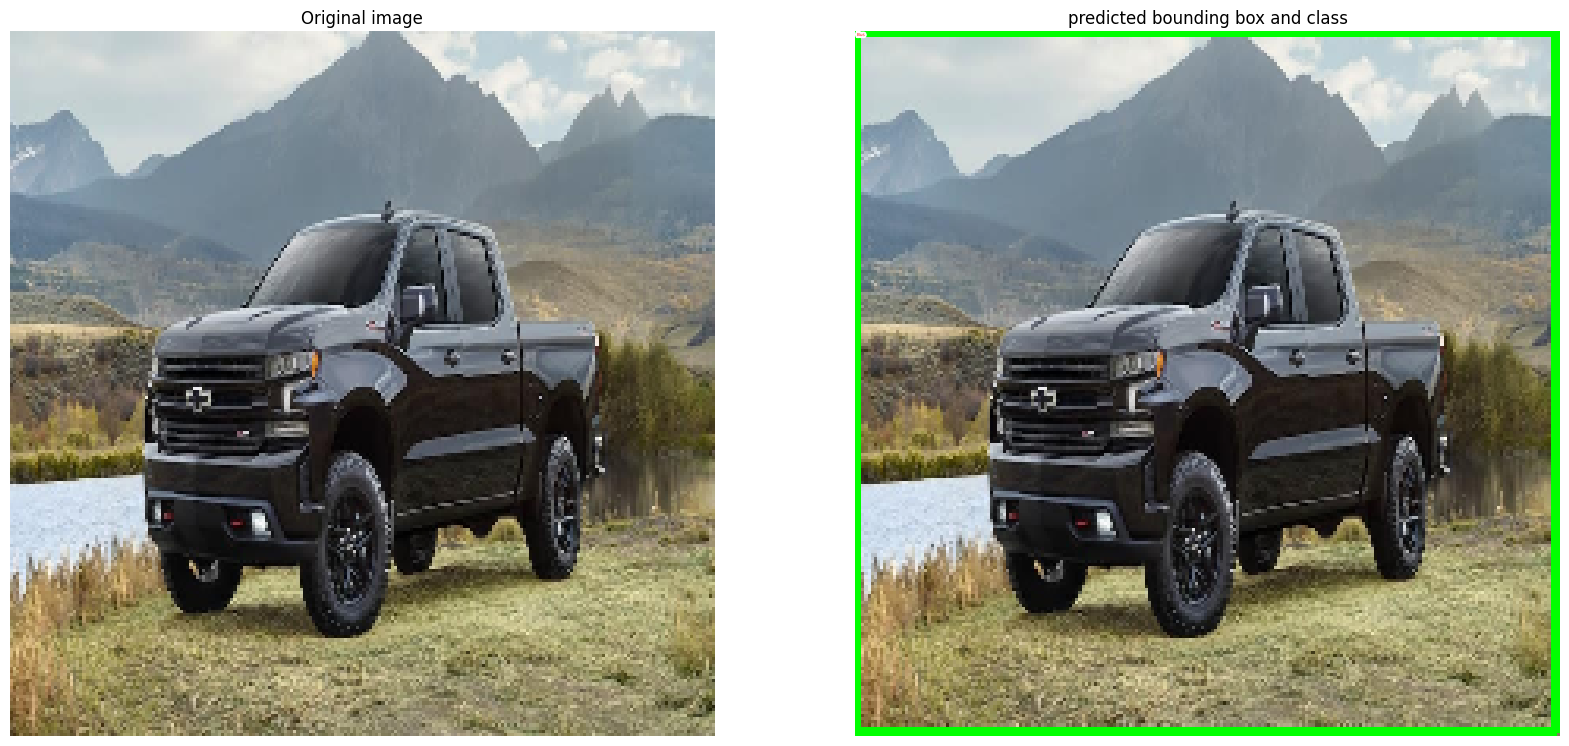

((0, 0, 222, 222), array(['Bus'], dtype=object), 0.4411963)

In [ ]:
test_predictions("/content/truck_1.jpg")

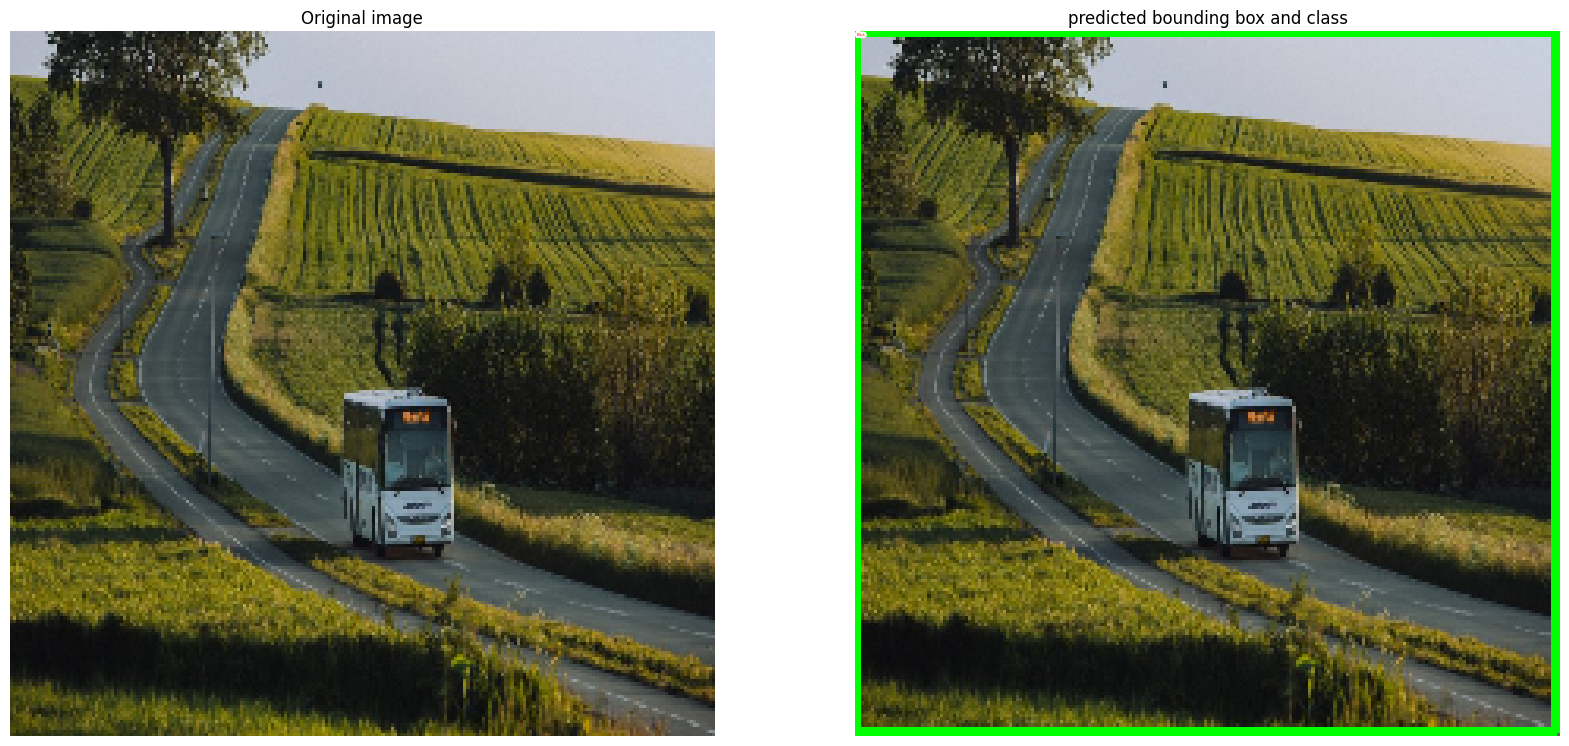

((0, 0, 222, 222), array(['Bus'], dtype=object), 0.40065977)

In [ ]:
test_predictions("bus.jpg")

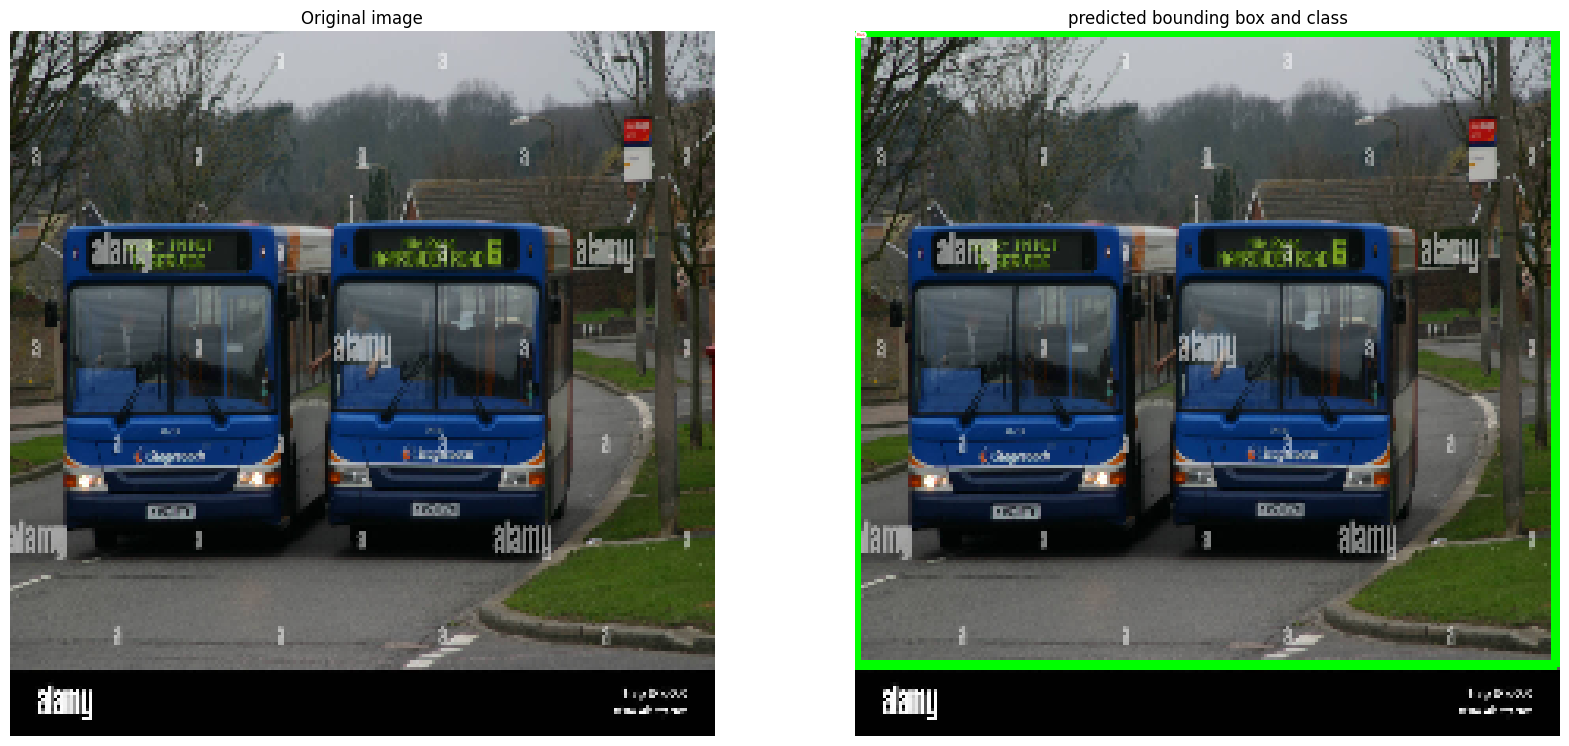

((0, 0, 222, 201), array(['Bus'], dtype=object), 0.46731484)

In [ ]:
test_predictions("2bus.jpg")

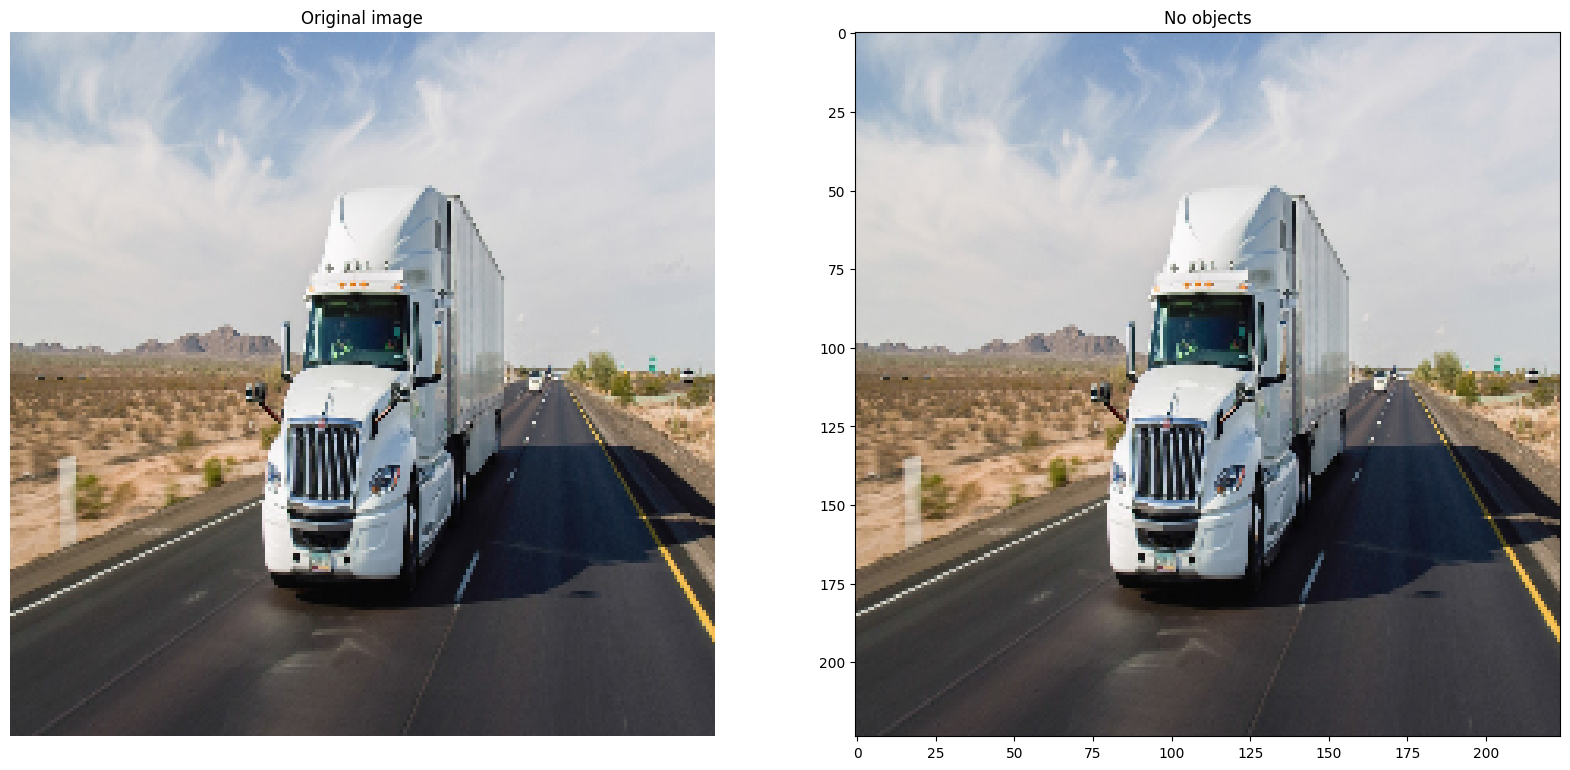

In [ ]:
test_predictions("truck_2.jpg")

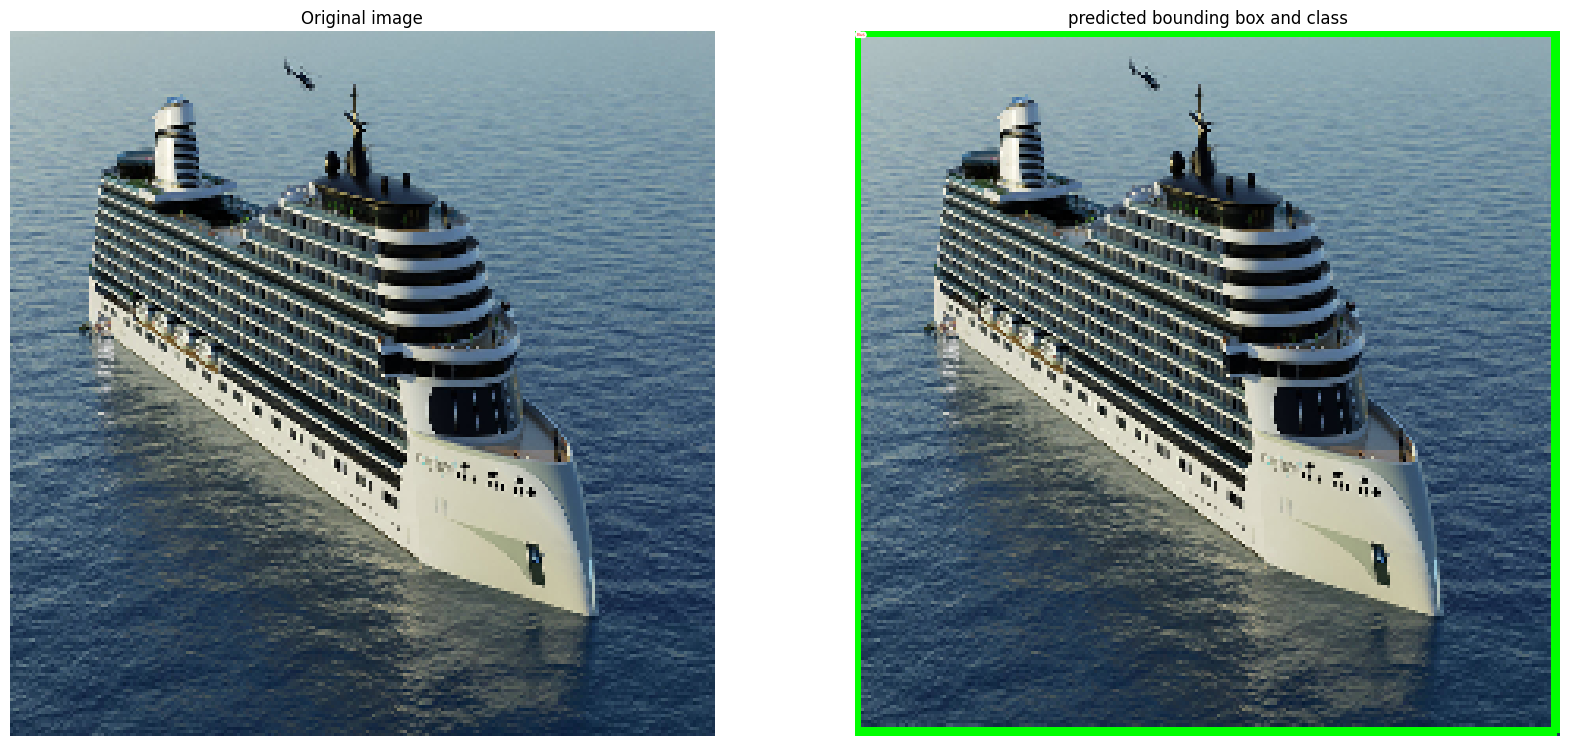

((0, 0, 222, 222), array(['Bus'], dtype=object), 0.43655914)

In [ ]:
test_predictions("ship.jpg")

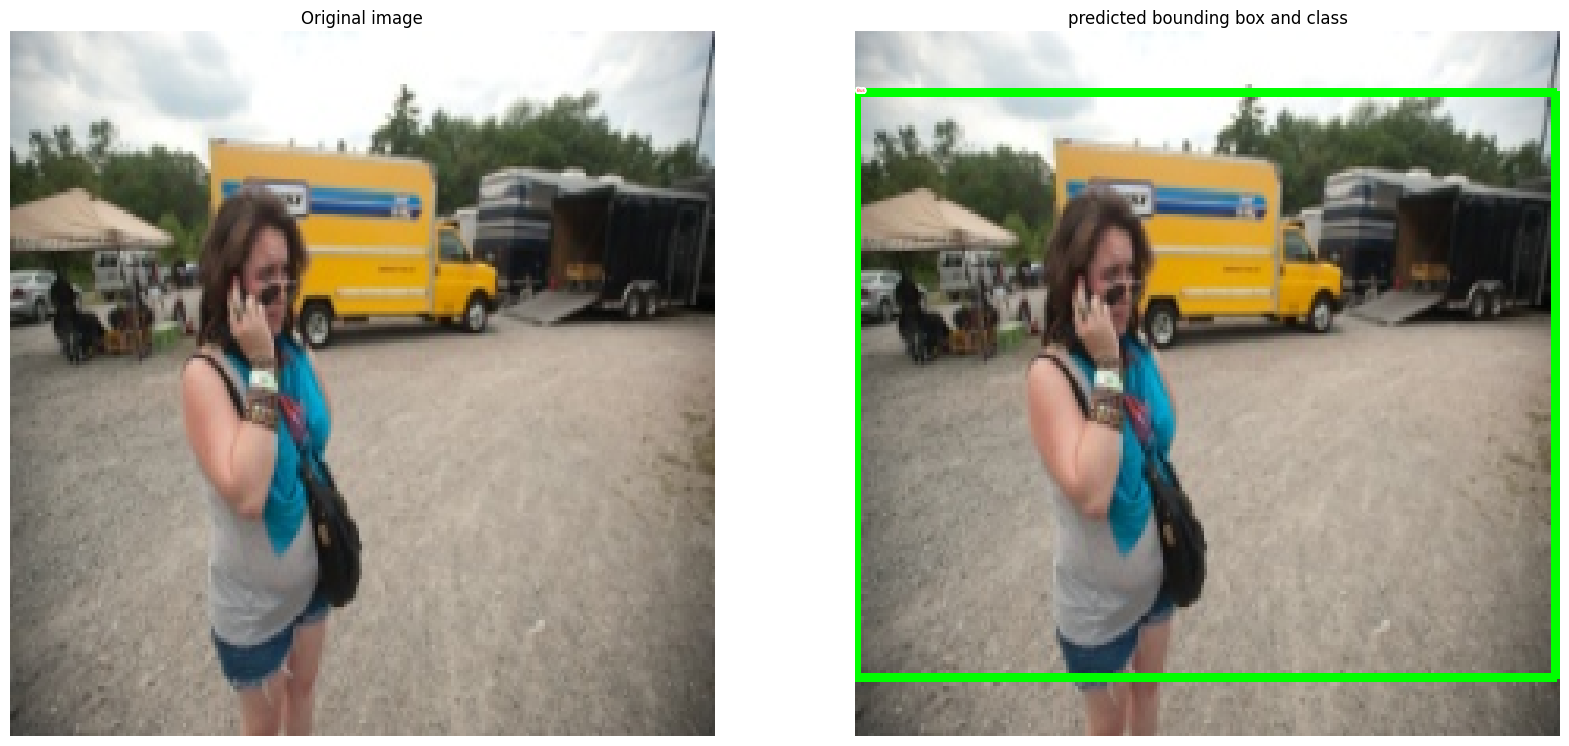

((0, 19, 222, 205), array(['Bus'], dtype=object), 0.45291856)

In [ ]:
test_predictions(FPATHS[1])

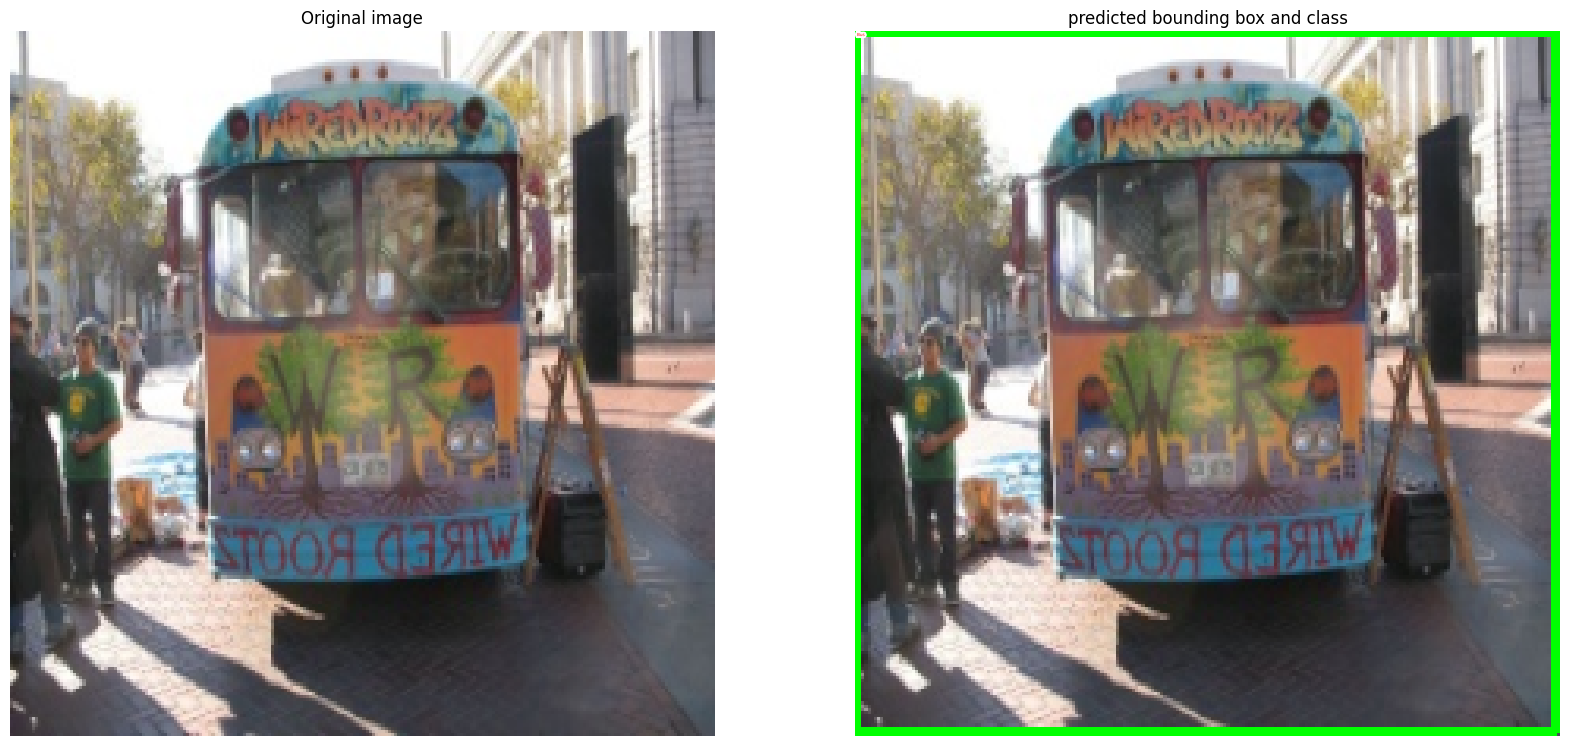

((0, 0, 222, 222), array(['Bus'], dtype=object), 0.4203194)

In [ ]:
test_predictions(FPATHS[45])

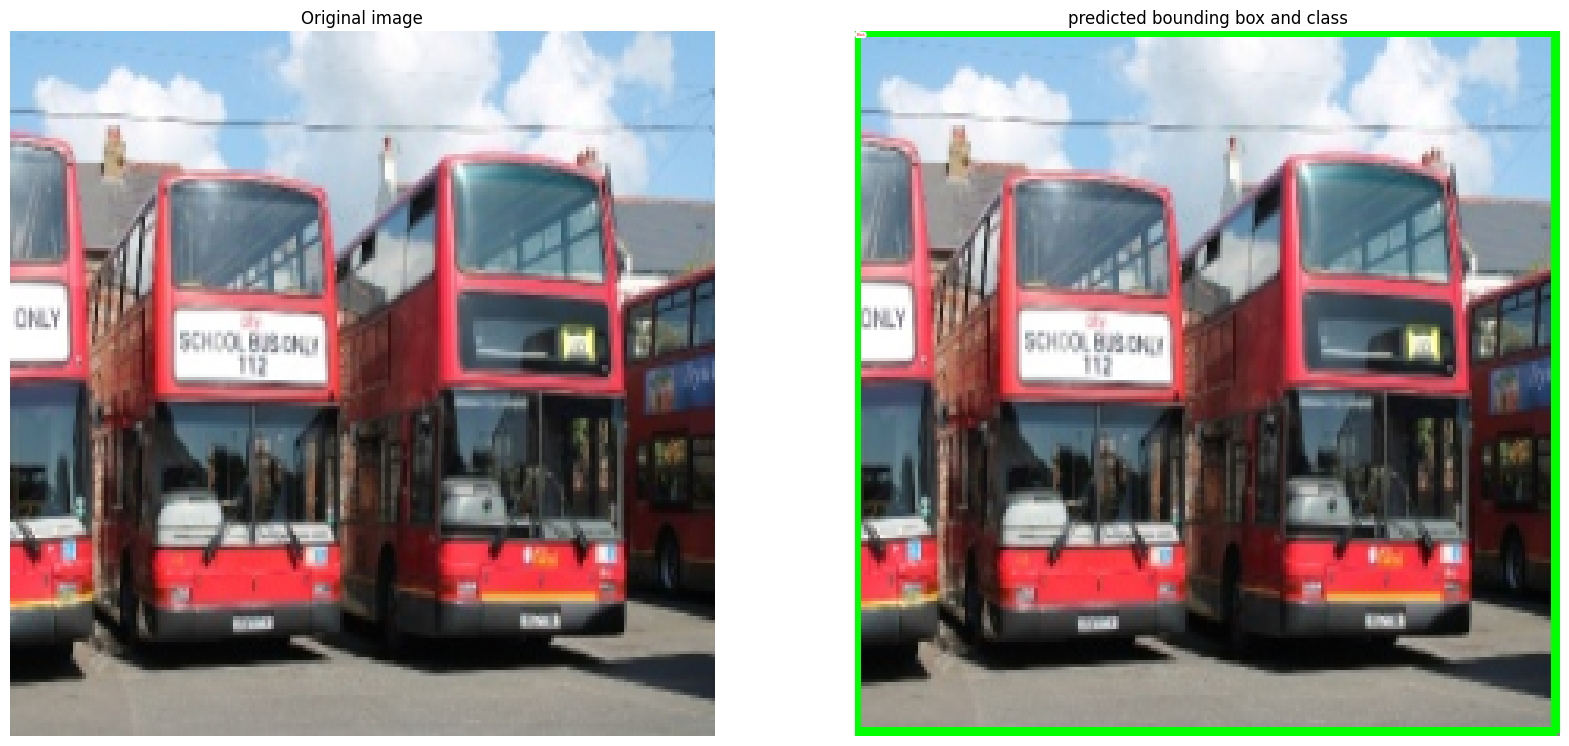

((0, 0, 222, 222), array(['Bus'], dtype=object), 0.44483694)

In [ ]:
test_predictions(test_dataset[29][-1])